In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/FFIV_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,FFIV,166.529999,166.529999,168.330002,165.419998,167.600006,756400
1,3/4/2019,FFIV,163.289993,163.289993,167.289993,161.710007,166.970001,553700
2,3/5/2019,FFIV,162.149994,162.149994,163.399994,161.970001,163.240005,511300
3,3/6/2019,FFIV,161.080002,161.080002,162.139999,159.949997,161.919998,527000
4,3/7/2019,FFIV,158.990005,158.990005,161.250000,157.910004,160.630005,783200
...,...,...,...,...,...,...,...,...
1319,5/28/2024,FFIV,168.339996,168.339996,170.000000,167.339996,169.119995,497000
1320,5/29/2024,FFIV,168.229996,168.229996,170.509995,166.550003,167.080002,655200
1321,5/30/2024,FFIV,167.300003,167.300003,168.669998,166.130005,168.309998,401100
1322,5/31/2024,FFIV,168.970001,168.970001,169.130005,164.580002,166.479996,1137700


In [3]:
data.describe

<bound method NDFrame.describe of            Date Symbol   Adj Close       Close        High         Low  \
0      3/1/2019   FFIV  166.529999  166.529999  168.330002  165.419998   
1      3/4/2019   FFIV  163.289993  163.289993  167.289993  161.710007   
2      3/5/2019   FFIV  162.149994  162.149994  163.399994  161.970001   
3      3/6/2019   FFIV  161.080002  161.080002  162.139999  159.949997   
4      3/7/2019   FFIV  158.990005  158.990005  161.250000  157.910004   
...         ...    ...         ...         ...         ...         ...   
1319  5/28/2024   FFIV  168.339996  168.339996  170.000000  167.339996   
1320  5/29/2024   FFIV  168.229996  168.229996  170.509995  166.550003   
1321  5/30/2024   FFIV  167.300003  167.300003  168.669998  166.130005   
1322  5/31/2024   FFIV  168.970001  168.970001  169.130005  164.580002   
1323   6/3/2024   FFIV  166.910004  166.910004  169.679993  166.320007   

            Open   Volume  
0     167.600006   756400  
1     166.970001   55

In [4]:
data.info

<bound method DataFrame.info of            Date Symbol   Adj Close       Close        High         Low  \
0      3/1/2019   FFIV  166.529999  166.529999  168.330002  165.419998   
1      3/4/2019   FFIV  163.289993  163.289993  167.289993  161.710007   
2      3/5/2019   FFIV  162.149994  162.149994  163.399994  161.970001   
3      3/6/2019   FFIV  161.080002  161.080002  162.139999  159.949997   
4      3/7/2019   FFIV  158.990005  158.990005  161.250000  157.910004   
...         ...    ...         ...         ...         ...         ...   
1319  5/28/2024   FFIV  168.339996  168.339996  170.000000  167.339996   
1320  5/29/2024   FFIV  168.229996  168.229996  170.509995  166.550003   
1321  5/30/2024   FFIV  167.300003  167.300003  168.669998  166.130005   
1322  5/31/2024   FFIV  168.970001  168.970001  169.130005  164.580002   
1323   6/3/2024   FFIV  166.910004  166.910004  169.679993  166.320007   

            Open   Volume  
0     167.600006   756400  
1     166.970001   5537

In [5]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4902.028, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4895.790, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4896.620, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4896.670, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4893.842, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4898.315, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.881 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [8]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#  Tính MAE
def calculate_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 23.30667505110434
Testing MAPE: 10.215194866841202
Testing MAE: 17.54763595376884


In [9]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037]


In [10]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037]


In [11]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037 142.9100037
 142

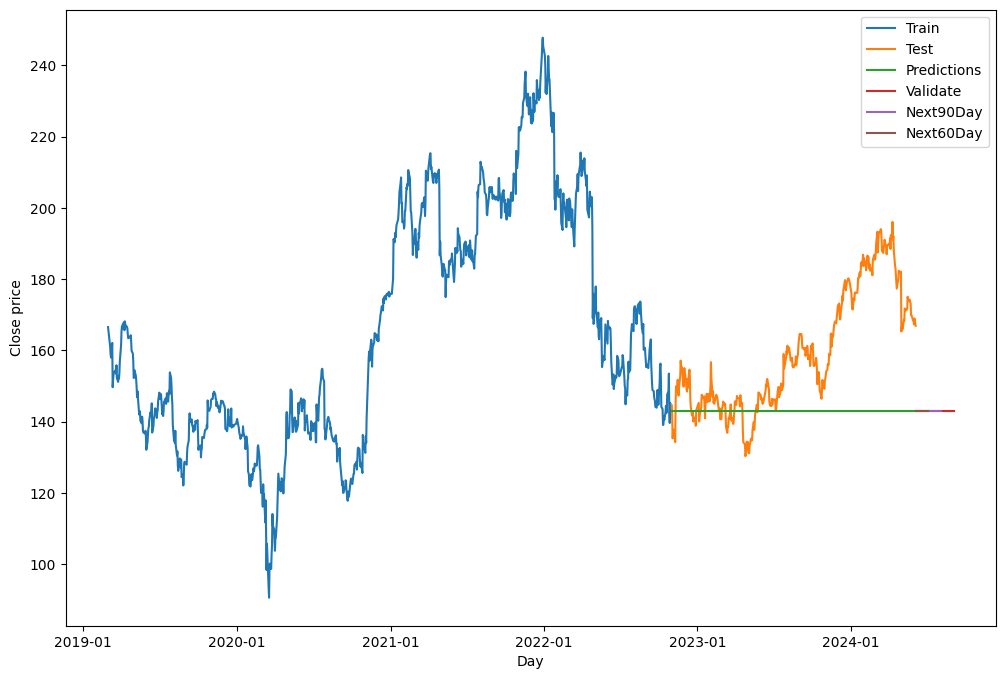

In [12]:
# 8.Vẽ hình
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'][:train_size], train_data['Close'])
plt.plot(data['Date'][train_size:], test_data['Close'])
plt.plot(data['Date'][train_size:], y_pred)
predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Train', 'Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

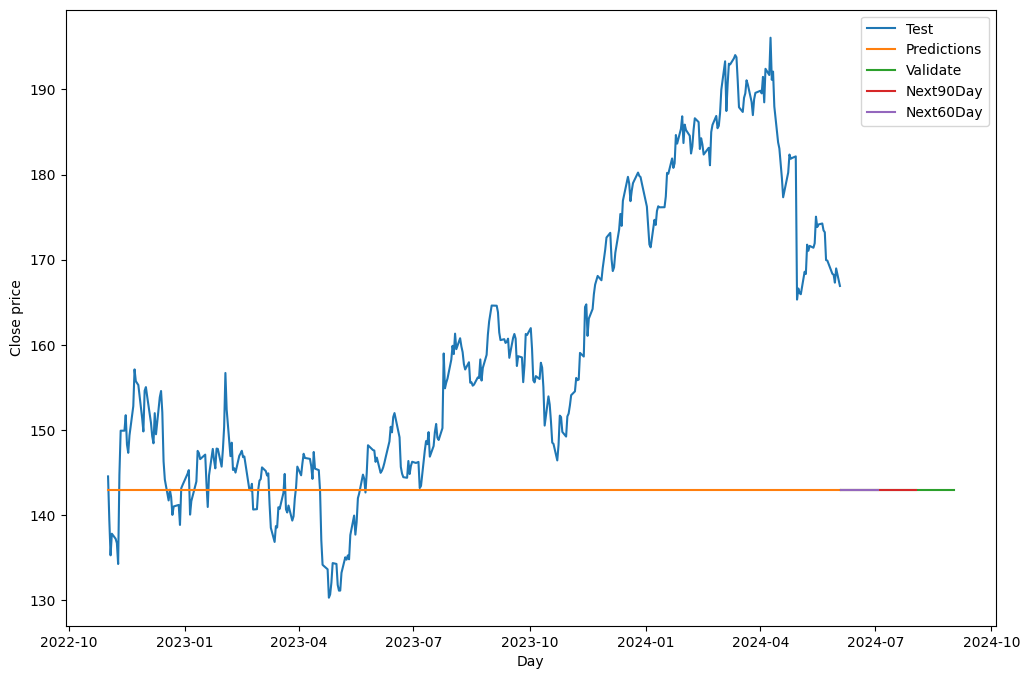

In [13]:
# 8.Vẽ hình test
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'][train_size:], test_data['Close'])
plt.plot(data['Date'][train_size:], y_pred)
predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

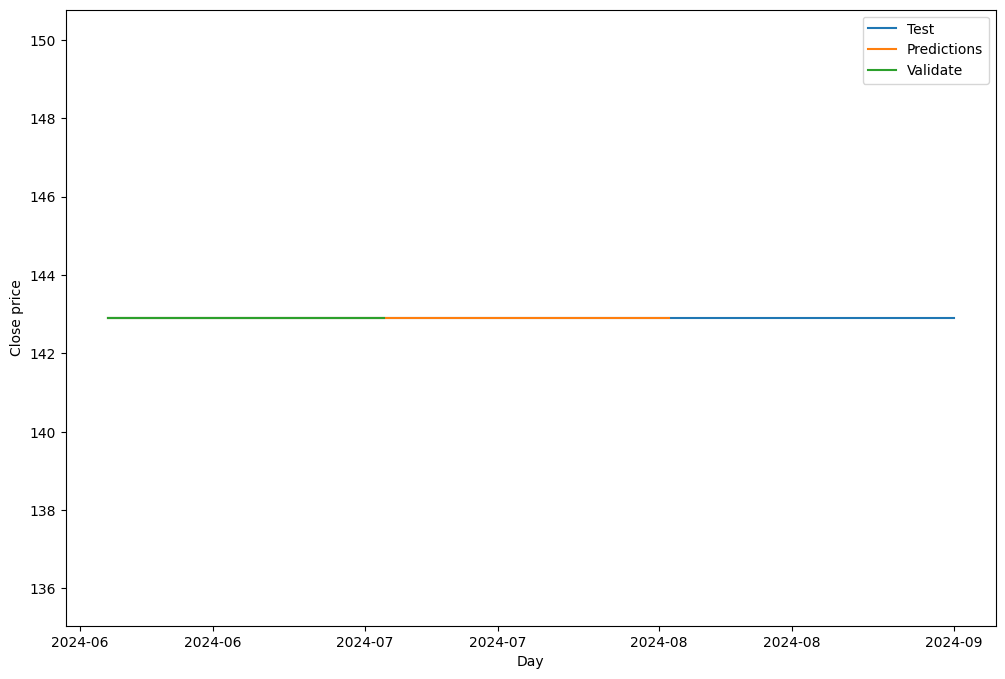

In [14]:
plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])

predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()